In [8]:

import tensorflow as tf
print(tf.__version__)

2.18.0


In [9]:
# Import system libs
import os  # Bibliothèque pour interagir avec le système de fichiers et exécuter des commandes liées au système.
import itertools  # Fournit des outils pour créer des itérations avancées (combinaisons, permutations, etc.).

# Import data handling tools
import numpy as np  # Bibliothèque pour les calculs numériques et la manipulation de tableaux (vecteurs et matrices).
import pandas as pd  # Outil pour la manipulation et l'analyse de données structurées (DataFrames).
import seaborn as sns  # Bibliothèque pour créer des visualisations statistiques élégantes et informatives.

sns.set_style('darkgrid')  # Définit le style graphique de Seaborn à "darkgrid".
import matplotlib.pyplot as plt  # Bibliothèque pour créer des graphiques et visualisations personnalisées.

from sklearn.model_selection import train_test_split  # Divise les ensembles de données en ensembles d'entraînement et de test.
from sklearn.metrics import confusion_matrix, classification_report  # Fournit des outils pour évaluer les performances du modèle.

# Import Deep Learning Libraries
import tensorflow as tf  # Framework pour créer et entraîner des modèles d'apprentissage profond.
from tensorflow import keras  # API de haut niveau pour la création de modèles, incluse dans TensorFlow.
from tensorflow.keras.models import Sequential  # Modèle séquentiel, adapté aux architectures linéaires.
from tensorflow.keras.optimizers import Adam, Adamax  # Optimiseurs pour ajuster les poids du modèle pendant l'entraînement.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Génère des images augmentées pour augmenter la robustesse du modèle.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization  # Couches utilisées dans les modèles CNN.
from tensorflow.keras.models import Model  # Fournit des outils pour créer des architectures complexes de modèles.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks pour arrêter l'entraînement ou ajuster le taux d'apprentissage automatiquement.
from tensorflow.keras.applications import EfficientNetB3  # Modèle pré-entraîné EfficientNetB3 pour le transfert d'apprentissage.
from keras.applications import VGG16  # Modèle pré-entraîné VGG16, également utilisé pour le transfert d'apprentissage.

# Ignore the warnings
import warnings  # Bibliothèque pour gérer les messages d'avertissement.
warnings.filterwarnings('ignore')  # Désactive les avertissements dans le code pour une sortie plus propre.


# **telechargement du dataset**


In [1]:
# Loading the dataset
def loading_the_data(data_dir):  # Définition d'une fonction pour charger les données depuis un répertoire donné.
    # Generate data paths with labels
    filepaths = []  # Liste pour stocker les chemins complets des fichiers d'image.
    labels = []  # Liste pour stocker les étiquettes correspondantes.

    # Get folder names
    folds = os.listdir(data_dir)  # Récupère la liste des noms de sous-dossiers dans le répertoire `data_dir`.

    for fold in folds:  # Parcourt chaque sous-dossier (chaque classe ou catégorie).
        foldpath = os.path.join(data_dir, fold)  # Construit le chemin complet vers le sous-dossier actuel.
        filelist = os.listdir(foldpath)  # Récupère la liste des fichiers (images) dans le sous-dossier.

        for file in filelist:  # Parcourt chaque fichier dans le sous-dossier actuel.
            fpath = os.path.join(foldpath, file)  # Construit le chemin complet vers le fichier.

            filepaths.append(fpath)  # Ajoute le chemin complet du fichier à la liste `filepaths`.
            labels.append(fold)  # Ajoute le nom du sous-dossier comme étiquette à la liste `labels`.

    # Concatenate data paths with labels into one DataFrame
    Fseries = pd.Series(filepaths, name='filepaths')  # Crée une série Pandas contenant les chemins des fichiers.
    Lseries = pd.Series(labels, name='labels')  # Crée une série Pandas contenant les étiquettes.

    df = pd.concat([Fseries, Lseries], axis=1)  # Concatène les deux séries en un DataFrame avec deux colonnes.
    
    return df  # Retourne le DataFrame contenant les chemins des fichiers et leurs étiquettes.


In [ ]:
# loading the data
data_dir = 'C:/Users/pc/Desktop/flowers recognition/archive/flowers'
df = loading_the_data(data_dir)
print(df.head())

# **Prétraitement des données**
Tout d'abord, nous vérifierons si les données d'entraînement sont équilibrées ou non.

Statistiques des classes :
labels
dandelion    1052
tulip         984
rose          784
daisy         764
sunflower     733
Name: count, dtype: int64

Total des exemples : 4317

Pourcentage par classe :
labels
dandelion    24.368775
tulip        22.793607
rose         18.160760
daisy        17.697475
sunflower    16.979384
Name: count, dtype: float64


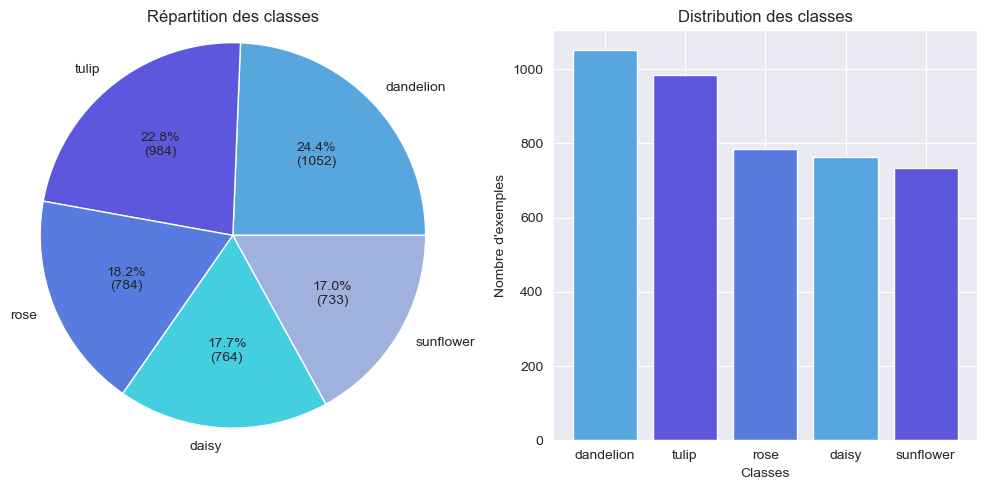


Aucune classe rare détectée.

Ratio classe majoritaire (dandelion) / classe minoritaire (sunflower): 1.44


In [14]:
import matplotlib.pyplot as plt

# Calculer les statistiques de base
data_balance = df.labels.value_counts()
total_samples = data_balance.sum()
percentage_per_class = (data_balance / total_samples) * 100

print("Statistiques des classes :")
print(data_balance)
print("\nTotal des exemples :", total_samples)
print("\nPourcentage par classe :")
print(percentage_per_class)

# Fonction pour les pourcentages sur le pie chart
def custom_autopct(pct):
    val = int(round(pct * total_samples / 100.0))
    return "{:.1f}%\n({:d})".format(pct, val)

# Graphique circulaire
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(data_balance, labels=data_balance.index, autopct=custom_autopct, 
        colors=["#57A6DE", "#5D57DE", "#577BDE", "#43CFE0", "#A0B1DE"])
plt.title("Répartition des classes")
plt.axis("equal")

# Histogramme
plt.subplot(1, 2, 2)
plt.bar(data_balance.index, data_balance.values, color=["#57A6DE", "#5D57DE", "#577BDE"])
plt.xlabel("Classes")
plt.ylabel("Nombre d'exemples")
plt.title("Distribution des classes")
plt.tight_layout()

plt.show()

# Analyse des classes rares
rare_classes = data_balance[data_balance < 0.05 * total_samples]
if not rare_classes.empty:
    print("\nClasses rares (moins de 5% du total) :")
    print(rare_classes)
else:
    print("\nAucune classe rare détectée.")

# Ratio classe majoritaire/minoritaire
max_class = data_balance.max()
min_class = data_balance.min()
ratio = max_class / min_class
print(f"\nRatio classe majoritaire ({data_balance.idxmax()}) / classe minoritaire ({data_balance.idxmin()}): {ratio:.2f}")

# **Nous pouvons dire que les données sont presque équilibrées.**

Maintenant, nous allons diviser le jeu de données en données d'entraînement, de validation et de test

In [16]:
# 80% train   20% test
train_df, ts_df = train_test_split(df, train_size = 0.8, shuffle = True, random_state = 42)

# test data  10% /10% (test, val)
valid_df, test_df = train_test_split(ts_df, train_size = 0.5, shuffle = True, random_state = 42)


# **Créer un générateur de données d'images**

In [18]:
batch_size = 16
img_size = (224, 224)

# Create generators for the data
tr_gen = ImageDataGenerator(rescale=1. / 255)
ts_gen = ImageDataGenerator(rescale=1. / 255)


# Convert the data
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)


Found 3453 validated image filenames belonging to 5 classes.
Found 432 validated image filenames belonging to 5 classes.
Found 432 validated image filenames belonging to 5 classes.


# **Afficher un échantillon des données d'entraînement**



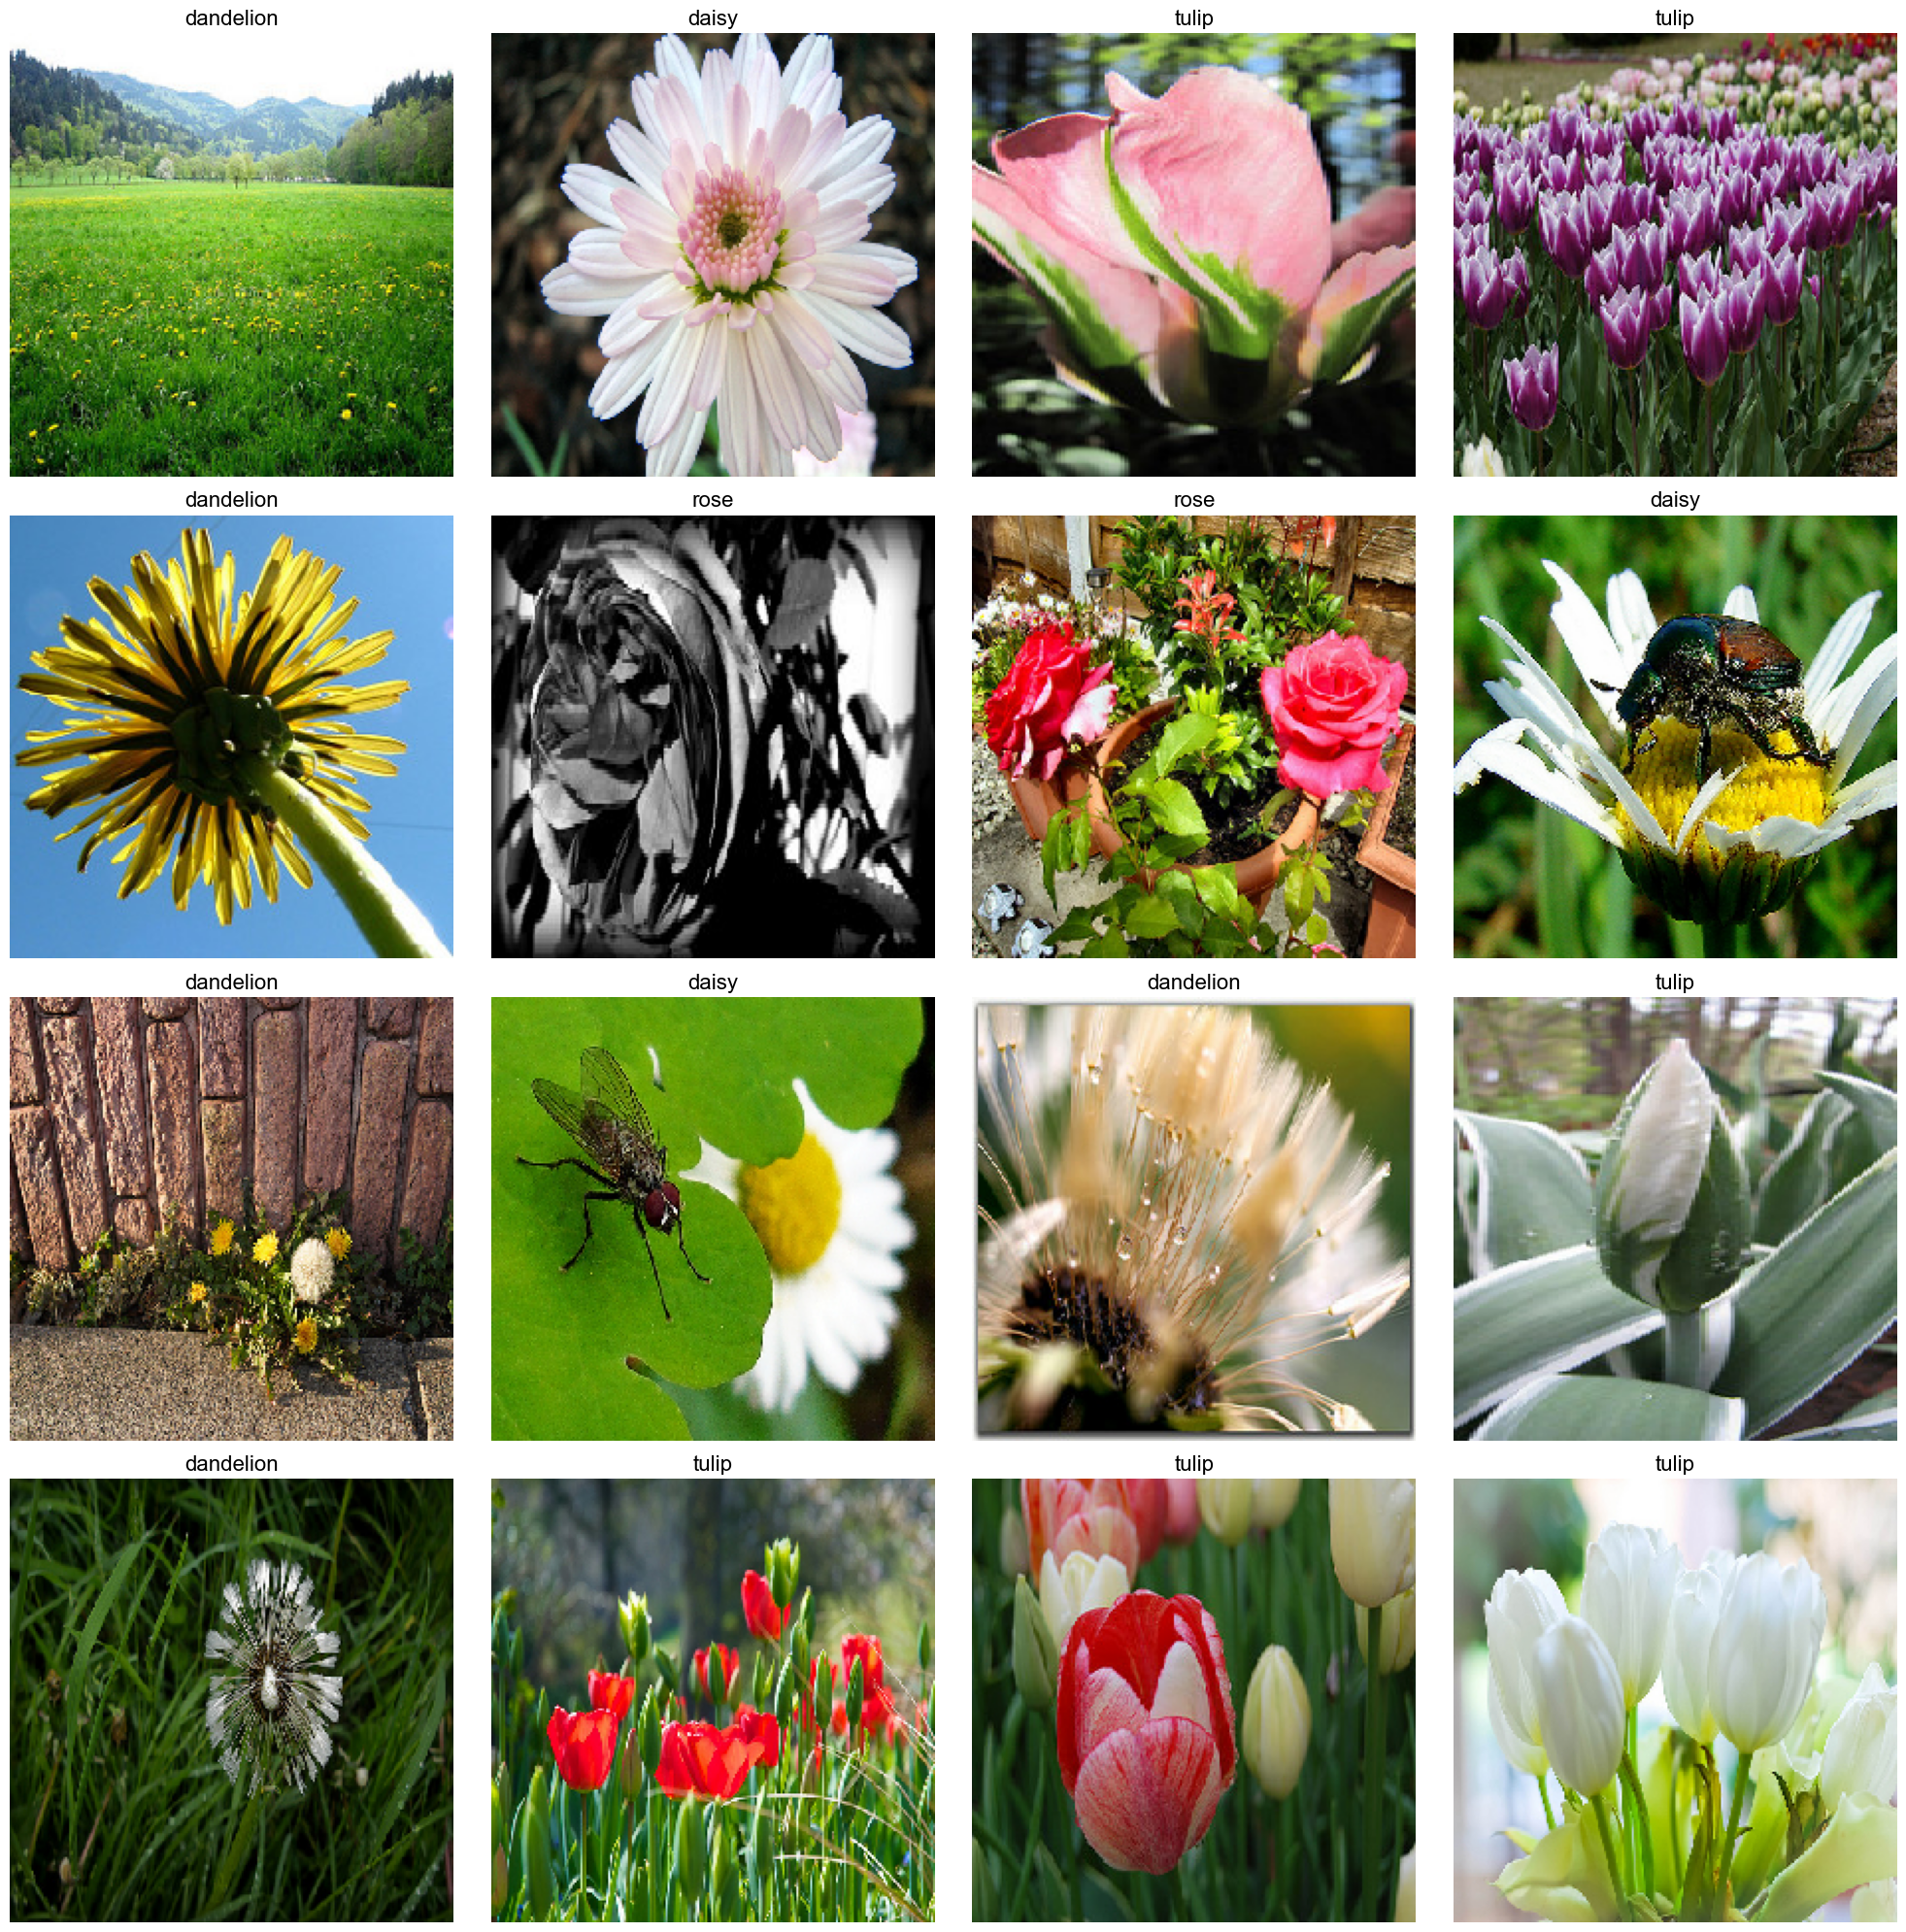

In [37]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

# ploting the patch size samples
plt.figure(figsize= (20, 20))

for i in range(batch_size):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Creer les fonctions necessaires**

In [39]:
# Displaying the model performance
def model_performance(history, Epochs):
    # Define needed variables
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    Epochs = [i+1 for i in range(len(tr_acc))]
    
    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()
    

# Evaluate the model
def model_evaluation(model):
    train_score = model.evaluate(train_gen, verbose= 1)
    valid_score = model.evaluate(valid_gen, verbose= 1)
    test_score = model.evaluate(test_gen, verbose= 1)
    
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    

# Get Predictions
def get_pred(model, test_gen):
    
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis = 1)
    
    return y_pred


# Confusion Matrix
def plot_confusion_matrix(test_gen, y_pred):
    
    g_dict = test_gen.class_indices
    classes = list(g_dict.keys())
    
    # Display the confusion matrix
    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.show()
    
    
# Defining a convolutional NN block for a sequential CNN model
def conv_block(filters, act='relu'):
    
    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPooling2D())
    
    return block


# Defining a dense NN block for a sequential CNN model
def dense_block(units, dropout_rate, act='relu'):
    
    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))
    
    return block

# **Models Structures**

# **CNN model**

In [41]:
# create Model structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_counts = len(list(train_gen.class_indices.keys()))     # to define number of classes in dense layer

In [43]:
# Définition du modèle CNN en tant que modèle séquentiel
cnn_model = Sequential()

# Premier bloc convolutionnel
# Ajout d'une couche de convolution avec 16 filtres, taille de noyau 3x3, padding "same" et activation ReLU
# La couche accepte des images en entrée avec la forme spécifiée par `img_shape`
cnn_model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu", input_shape=img_shape))
# Ajout d'une couche de normalisation pour stabiliser et accélérer l'apprentissage
cnn_model.add(BatchNormalization())
# Ajout d'une couche de pooling (réduction de la dimension spatiale par un maximum)
cnn_model.add(MaxPooling2D())

# Deuxième bloc convolutionnel
# Ajout d'un bloc convolutionnel avec 32 filtres
cnn_model.add(conv_block(32))

# Troisième bloc convolutionnel
# Ajout d'un bloc convolutionnel avec 64 filtres
cnn_model.add(conv_block(64))

# Quatrième bloc convolutionnel
# Ajout d'un bloc convolutionnel avec 128 filtres
cnn_model.add(conv_block(128))

# Cinquième bloc convolutionnel
# Ajout d'un bloc convolutionnel avec 256 filtres
cnn_model.add(conv_block(256))

# Sixième bloc convolutionnel
# Ajout d'un bloc convolutionnel avec 512 filtres
cnn_model.add(conv_block(512))

# Couche Flatten
# Conversion des données multidimensionnelles (sortie des couches convolutives) en un vecteur unidimensionnel
cnn_model.add(Flatten())

# Premier bloc dense
# Ajout d'une couche dense entièrement connectée avec 256 neurones et une régularisation dropout de 50 %
cnn_model.add(dense_block(256, 0.5))

# Deuxième bloc dense
# Ajout d'une couche dense entièrement connectée avec 128 neurones et une régularisation dropout de 30 %
cnn_model.add(dense_block(128, 0.3))

# Troisième bloc dense
# Ajout d'une couche dense entièrement connectée avec 64 neurones et une régularisation dropout de 20 %
cnn_model.add(dense_block(64, 0.2))

# Quatrième bloc dense
# Ajout d'une couche dense entièrement connectée avec 32 neurones et une régularisation dropout de 20 %
cnn_model.add(dense_block(32, 0.2))

# Couche de sortie
# Ajout de la couche finale dense avec un nombre de neurones égal au nombre de classes (`class_counts`) et activation softmax
# Cette couche génère des probabilités pour chaque classe
cnn_model.add(Dense(class_counts, activation="softmax"))


In [45]:
#Prépare le modèle à l’entraînement en configurant l’optimiseur, la fonction de perte et les métriques d’évaluation.
cnn_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

cnn_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (None, 56, 56, 32)     │        14,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ (None, 28, 28, 64)     │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 14, 14, 128)    │       221,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_14 (Sequential)      │ (None, 7, 7, 256)      │       886,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_15 (Sequential)      │ (None, 3, 3, 512)      │     3,542,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_16 (Sequential)      │ (None, 256)            │     1,180,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 128)            │        33,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,945,669 (22.68 MB)

 Trainable params: 5,942,693 (22.67 MB)

 Non-trainable params: 2,976 (11.62 KB)

In [47]:
# train the model
epochs = 20   # number of all epochs in training

history = cnn_model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 94s 374ms/step - accuracy: 0.2491 - loss: 1.9659 - val_accuracy: 0.2616 - val_loss: 3.6149
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 80s 372ms/step - accuracy: 0.3524 - loss: 1.6114 - val_accuracy: 0.2685 - val_loss: 2.5131
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 81s 373ms/step - accuracy: 0.3995 - loss: 1.4454 - val_accuracy: 0.4630 - val_loss: 1.3351
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 80s 370ms/step - accuracy: 0.4270 - loss: 1.3330 - val_accuracy: 0.5625 - val_loss: 1.0951
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 80s 371ms/step - accuracy: 0.4724 - loss: 1.2831 - val_accuracy: 0.5787 - val_loss: 1.0676
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 80s 371ms/step - accuracy: 0.4900 - loss: 1.2176 - val_accuracy: 0.5903 - val_loss: 1.0516
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 80s 370ms/step - accuracy: 0.5147 - loss: 1.1662 - val_accuracy: 0.5324 - val_loss: 1.1521
Epoch 8/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 81s 374ms/step - accuracy: 0.5381 - loss: 1

**Affichage la performance du model**

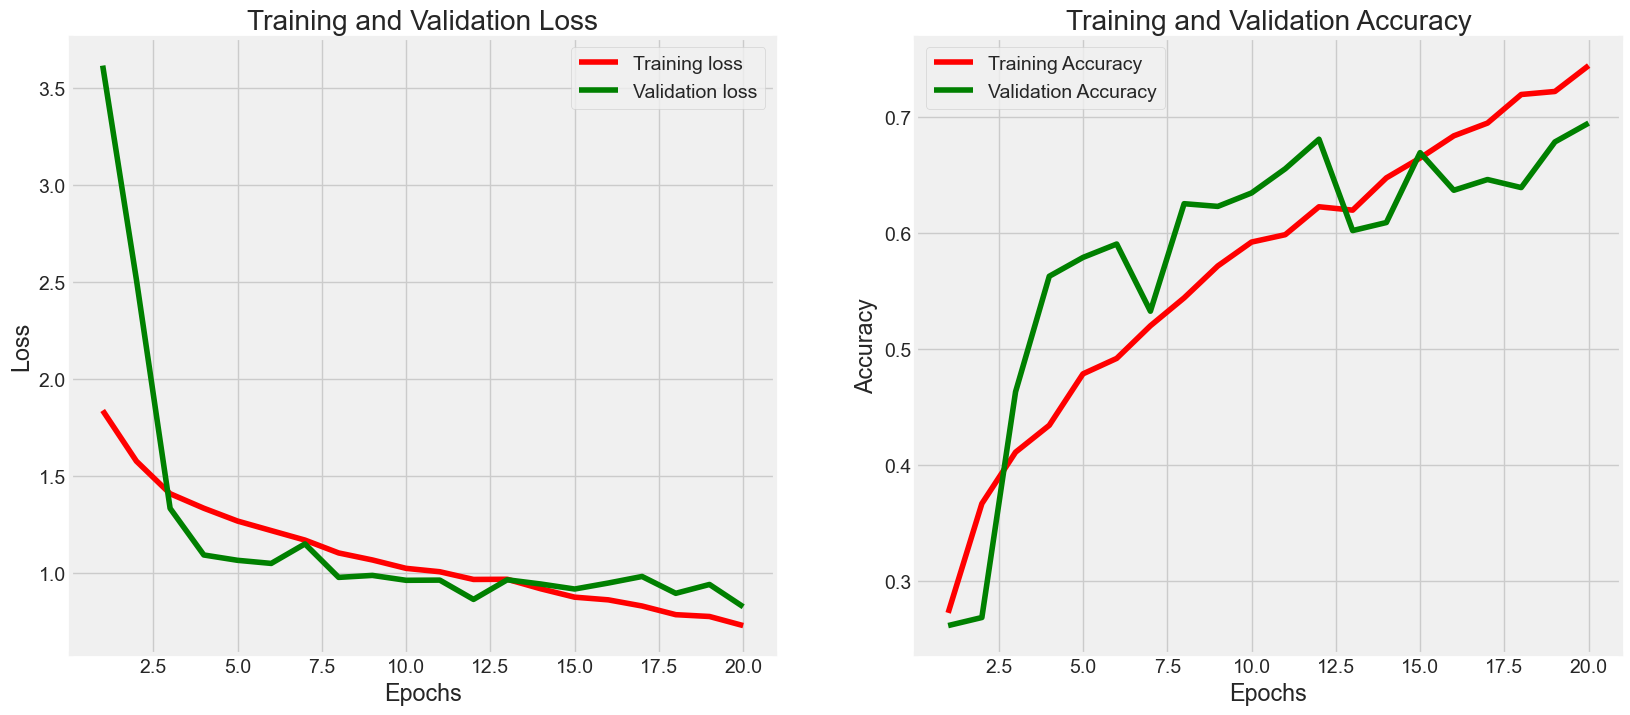

In [49]:
# Display model performance
model_performance(history, epochs)

**Evaluation du model**

In [51]:
# Model evaluation
model_evaluation(cnn_model)

216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7670 - loss: 0.6038
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7245 - loss: 0.7993
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.6945 - loss: 0.7401
Train Loss:  0.611237645149231
Train Accuracy:  0.7622357606887817
--------------------
Validation Loss:  0.8284750580787659
Validation Accuracy:  0.6944444179534912
--------------------
Test Loss:  0.7243965864181519
Test Accuracy:  0.7129629850387573


# **Matrice de confusion**

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
Shape of y_pred: (432,)
Classification Report:
              precision    recall  f1-score   support

       daisy       0.61      0.83      0.70        76
   dandelion       0.85      0.75      0.79       110
        rose       0.59      0.77      0.67        87
   sunflower       0.75      0.84      0.79        73
       tulip       0.95      0.41      0.57        86

    accuracy                           0.71       432
   macro avg       0.75      0.72      0.70       432
weighted avg       0.76      0.71      0.71       432



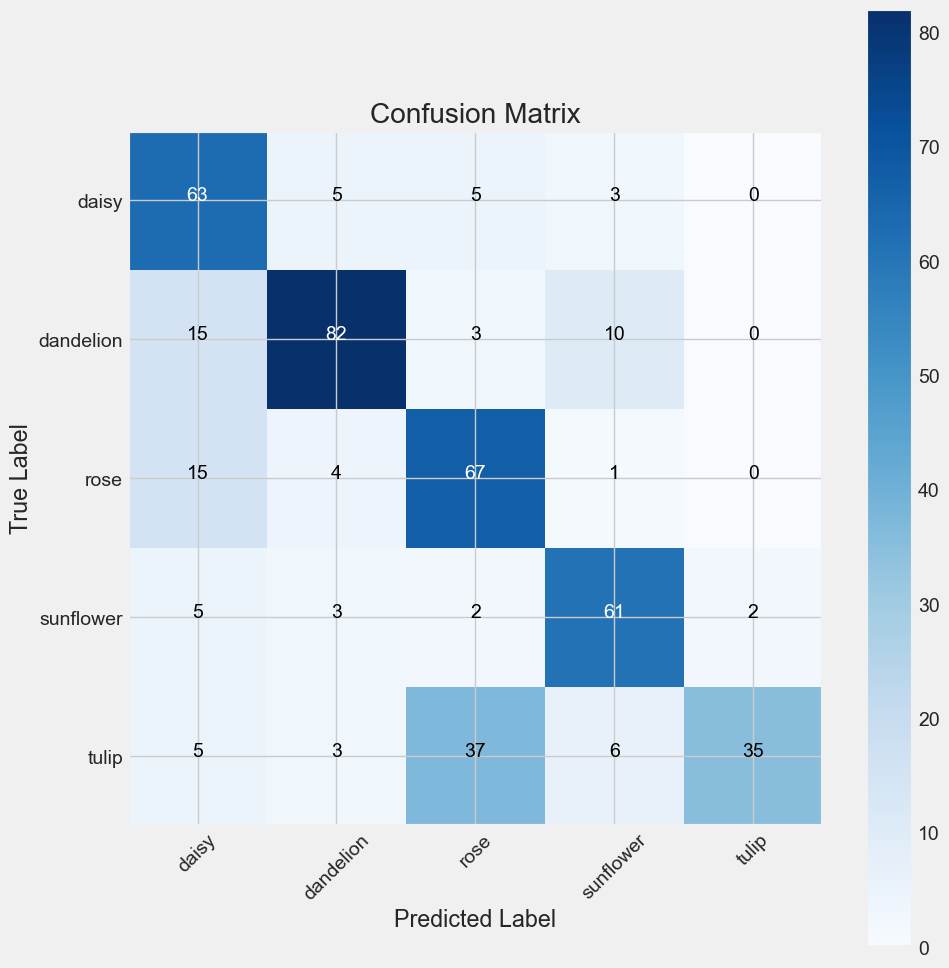

Model saved successfully at: ./cnn_model.h5


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Obtain predictions
y_pred = get_pred(cnn_model, test_gen)

# Debugging: Check shape of y_pred
print(f"Shape of y_pred: {y_pred.shape}")

# Determine true and predicted classes
y_true = test_gen.classes  # True labels
if len(y_pred.shape) == 1:  # If y_pred is 1D
    y_pred_classes = y_pred.astype(int)  # Ensure integer class indices
else:  # If y_pred is 2D (probabilities)
    y_pred_classes = np.argmax(y_pred, axis=1)

# Display the classification report
print("Classification Report:")
target_names = list(test_gen.class_indices.keys())  # Class names
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Plot confusion matrix
plot_confusion_matrix(test_gen, y_pred_classes)

# Save the model
model_save_path = "./cnn_model.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)  # Create directory if needed
cnn_model.save(model_save_path)
print(f"Model saved successfully at: {model_save_path}")


# **EfficientNetB3**

In [3]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Définir la forme de l'entrée et le nombre de classes
img_shape = (224, 224, 3)  # Taille des images d'entrée
class_counts = 5  # Exemple : 5 classes (modifiez selon vos données)

# Fonction pour ajouter un bloc Dense avec Dropout
def dense_block(units, dropout_rate):
    def block(x):
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
        return x
    return block

# Charger le modèle pré-entraîné EfficientNetB3
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=img_shape, pooling=None)

# Ajouter des couches personnalisées au-dessus du modèle pré-entraîné
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Réduction de la dimension
x = BatchNormalization()(x)  # Normalisation pour stabiliser l'apprentissage
x = dense_block(128, 0.5)(x)  # Bloc dense avec Dropout
x = dense_block(32, 0.2)(x)  # Bloc dense avec Dropout
predictions = Dense(class_counts, activation="softmax")(x)  # Couche de sortie avec activation Softmax

# Définir le modèle complet
EfficientNetB3_model = Model(inputs=base_model.input, outputs=predictions)

# Compiler le modèle
EfficientNetB3_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Résumé du modèle
EfficientNetB3_model.summary()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 10,990,708 (41.93 MB)

 Trainable params: 10,900,333 (41.58 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [7]:
from tensorflow.keras.optimizers import Adamax

# Compiler le modèle avec Adamax comme optimiseur
EfficientNetB3_model.compile(
    optimizer=Adamax(learning_rate=0.0001),  # Optimiseur Adamax avec un learning rate de 0.0001
    loss='categorical_crossentropy',         # Fonction de perte pour classification multi-classes
    metrics=['accuracy']                     # Mesure de précision
)

# Afficher le résumé du modèle
EfficientNetB3_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 10,990,708 (41.93 MB)

 Trainable params: 10,900,333 (41.58 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin vers le dossier contenant les sous-dossiers de classes
data_dir = "C:/Users/pc/Desktop/flowers recognition/archive/flowers"  # Remplacez par le chemin de votre dossier "flowers"

# Fractionnement des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalisation
    rotation_range=20,        # Augmentation des données (rotation)
    width_shift_range=0.2,    # Décalage horizontal
    height_shift_range=0.2,   # Décalage vertical
    shear_range=0.2,          # Cisaillement
    zoom_range=0.2,           # Zoom
    horizontal_flip=True,     # Retour horizontal
    validation_split=0.2      # Fraction de validation (20% des données)
)

# Générateur pour l'entraînement
train_gen = train_datagen.flow_from_directory(
    data_dir, 
    target_size=(224, 224),   # Taille des images
    batch_size=32,            # Taille des lots
    class_mode='categorical', # One-hot encoding des étiquettes
    subset='training',        # Indique que c'est l'ensemble d'entraînement
    shuffle=True              # Mélanger les données
)

# Générateur pour la validation
valid_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # Indique que c'est l'ensemble de validation
    shuffle=True
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


**Display model performance**

In [ ]:
# Display model performance
model_performance(EfficientNetB3_history, epochs)


**Evaluate the model**

In [22]:
def model_evaluation(model, validation_gen):
    print("Évaluation du modèle sur les données de validation...")
    metrics = model.evaluate(validation_gen, verbose=1)
    print(f"Perte (Loss) : {metrics[0]:.4f}")
    print(f"Précision (Accuracy) : {metrics[1]:.4f}")
    return metrics
# Évaluer le modèle sur les données de validation
evaluation_results = model_evaluation(EfficientNetB3_model, valid_gen)


Évaluation du modèle sur les données de validation...
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 910ms/step - accuracy: 0.2112 - loss: 1.6041
Perte (Loss) : 1.6061
Précision (Accuracy) : 0.2047


**Get predictions and display the confusion matrix**

Found 4317 images belonging to 5 classes.
Obtention des prédictions...
135/135 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step


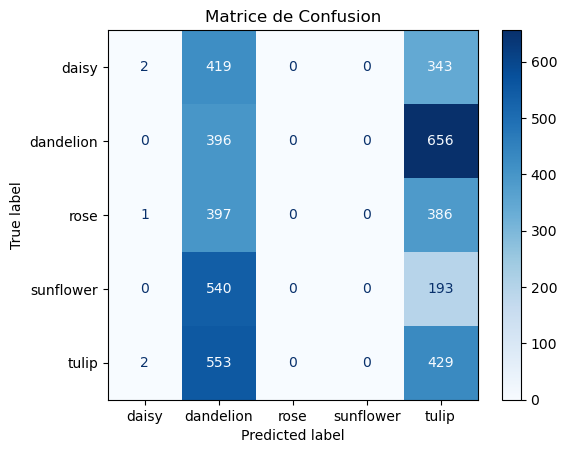

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
test_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ne mélangez pas pour aligner les indices
)

def get_pred(model, test_gen):
    print("Obtention des prédictions...")
    y_pred = model.predict(test_gen, verbose=1)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Obtenir les classes prédictes
    return y_pred_classes

def plot_confusion_matrix(test_gen, y_pred_classes):
    # Obtenir les étiquettes réelles
    y_true = test_gen.classes  # Étiquettes réelles
    
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_true, y_pred_classes)
    
    # Afficher la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Matrice de Confusion")
    plt.show()
# Obtenir les prédictions
y_pred_classes = get_pred(EfficientNetB3_model, test_gen)

# Tracer la matrice de confusion
plot_confusion_matrix(test_gen, y_pred_classes)


# **VGG16**

In [34]:
# Importation des modules nécessaires
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# get the pre-trained model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img_shape, pooling='max')

# freeze four convolution blocks
for layer in base_model.layers[:15]:
    layer.trainable = False

# fine-tune VGG16 (Adding some custom layers on top)
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)  # Dropout layer to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(class_counts, activation="sigmoid")(x)  # output layer with softmax activation

# the model
VGG16_model = Model(inputs=base_model.input, outputs=predictions)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [36]:
# Check the trainable status of the layers
for layer in VGG16_model.layers:
    print(layer.name, layer.trainable)

input_layer_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
global_max_pooling2d True
flatten True
dense_3 True
dropout_2 True
dense_4 True
dense_5 True
dense_6 True
dense_7 True


In [38]:
VGG16_model.compile(optimizer=Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

VGG16_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,145,861 (57.78 MB)

 Trainable params: 7,510,597 (28.65 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [40]:
# train the model
epochs = 20   # number of all epochs in training

VGG16_history = VGG16_model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.4506 - loss: 0.4440 - val_accuracy: 0.7907 - val_loss: 0.2343
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.7770 - loss: 0.2299 - val_accuracy: 0.8198 - val_loss: 0.1802
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.8314 - loss: 0.1749 - val_accuracy: 0.8570 - val_loss: 0.1571
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.8539 - loss: 0.1501 - val_accuracy: 0.8686 - val_loss: 0.1484
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.8775 - loss: 0.1321 - val_accuracy: 0.8744 - val_loss: 0.1340
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.8917 - loss: 0.1152 - val_accuracy: 0.8802 - val_loss: 0.1304
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.8940 - loss: 0.1086 - val_accuracy: 0.8802 - val_loss: 0.1370
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.9196 - loss: 0.0905 - val_accu

**Display model performance**

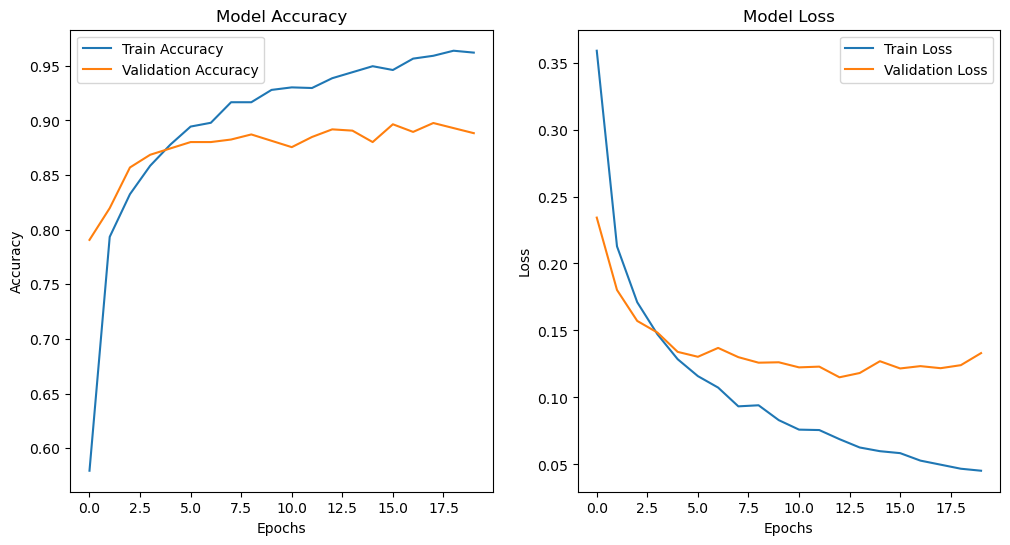

In [44]:
import matplotlib.pyplot as plt

# Define a function to display model performance
def model_performance(history, epochs):
    # Accuracy plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history.history['loss'], label='Train Loss')
    plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Example usage (assuming VGG16_history is the history object returned from model training)
model_performance(VGG16_history, epochs)


**Evaluate the model**

In [50]:
# Assurez-vous d'avoir défini votre générateur de validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Création d'un générateur de validation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_gen = validation_datagen.flow_from_directory(
    'C:/Users/pc/Desktop/flowers recognition',  # Remplacez par le chemin vers vos données de validation
    target_size=(224, 224),  # Taille des images (en fonction de votre modèle)
    batch_size=32,
    class_mode='categorical'  # Utilisez 'binary' ou 'categorical' en fonction de votre type de problème
)

# Fonction d'évaluation du modèle
def model_evaluation(model, validation_gen):
    # Évaluer le modèle sur le générateur de validation
    score = model.evaluate(validation_gen)
    print("Evaluation Loss:", score[0])
    print("Evaluation Accuracy:", score[1])

# Appel de la fonction d'évaluation
model_evaluation(VGG16_model, validation_gen)


Found 4356 images belonging to 4 classes.


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/logistic_loss/mul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\pc\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\pc\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\pc\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\Users\pc\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\pc\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\pc\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\pc\AppData\Local\Temp\ipykernel_31084\3923639184.py", line 21, in <module>

  File "C:\Users\pc\AppData\Local\Temp\ipykernel_31084\3923639184.py", line 16, in model_evaluation

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 484, in evaluate

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in test_step

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 691, in __call__

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 700, in call

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 2302, in binary_crossentropy

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1794, in binary_crossentropy

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 785, in binary_crossentropy

Incompatible shapes: [32,4] vs. [32,5]
	 [[{{node compile_loss/binary_crossentropy/logistic_loss/mul}}]] [Op:__inference_multi_step_on_iterator_65295]

**Get predictions and display the confusion matrix**

In [ ]:
# get predictions
y_pred = get_pred(VGG16_model, test_gen)

# plot the confusion matrix
plot_confusion_matrix(test_gen, y_pred)